### Generate the post hoc dataset for analysis

In [1]:
import math
import time
import parmap
import pickle
import multiprocessing
from imagen_posthocloader import *
import matplotlib.pyplot as plt
import seaborn as sns
from plot_results_posthoc import *
%matplotlib inline

In [2]:
num_cores = multiprocessing.cpu_count()
print(f'Available CPU cores: {num_cores}')
num_cores = math.floor(num_cores/3)
print(f'Set CPU cores: {num_cores}')

Available CPU cores: 48
Set CPU cores: 16


In [3]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

### 1. Load the [INSTRUMENT](https://imagen-europe.com/resources/imagen-dataset/documentation/) data

#### collect the selected instrument files from IMAGEN_RAW and store in posthoc

Please refer to <i>set_INSTRUMENT()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b> 

In [4]:
# Instrument
## Demographic
PBQ   = posthoc.set_INSTRUMENT('PBQ')#, save=True)
GEN   = posthoc.set_INSTRUMENT('GEN')#, save=True)
LEQ   = posthoc.set_INSTRUMENT('LEQ')#, save=True)
# DAWBA
# CANTAB
NEO   = posthoc.set_INSTRUMENT('NEO')#, save=True)
SURPS = posthoc.set_INSTRUMENT('SURPS')#, save=True)
TCI = posthoc.set_INSTRUMENT('TCI')#, save=True)
BSI = posthoc.set_INSTRUMENT('BSI')#, save=True)
# KIRBY
# BIS-11
# CSI
# PHQ
# CES-D
# ANXDX
# CAPE
# SDQ
# IRI
# RRS
# PALP
## Social
# CTQ   = posthoc.set_INSTRUMENT('CTQ')#, save=True)
CTQ_MD = posthoc.set_INSTRUMENT('CTQ_MD')#, save=True)
CTS   = posthoc.set_INSTRUMENT('CTS')#, save=True)
PANAS = posthoc.set_INSTRUMENT('PANAS')#, save=True)
# MINI5
## Substance Use
MAST = posthoc.set_INSTRUMENT('MAST')#, save=True)
FTND  = posthoc.set_INSTRUMENT('FTND')#, save=True)
# DAST
# SCID
# RAPI
# DMQ
# Bully Questionnaire
# ESPAD
# TLFB
# AUDIT

### 2. Load the HDF5 data

#### collect the HDF5 files from h5files and save in posthoc

Please refer to <i>set_HDF5()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b>

In [5]:
# Hdf5
BINGE = posthoc.set_HDF5('Binge')#, save=True)

In [6]:
# general information of the hdf5
BINGE.columns

Index(['ID', 'Session', 'y', 'Dataset', 'Sex', 'Site', 'Class'], dtype='object')

### 3. Load the RUN data

#### collect the RUN file from results and save in posthoc

Please refer to <i>set_RUN()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b>

In [7]:
# RUN
RUN = posthoc.set_RUN('../../results/holdout_all-tp-clean_run.csv')#, save=True)

In [8]:
# general infromation of the hdf5
RUN.columns

Index(['i', 'o', 'io', 'technique', 'Session', 'Trial', 'path', 'n_samples',
       'n_samples_cc', 'i_is_conf', 'o_is_conf', 'Model', 'model_SVM-rbf__C',
       'model_SVM-rbf__gamma', 'runtime', 'model_SVM-lin__C',
       'model_GB__learning_rate', 'model_LR__C', 'train_score', 'valid_score',
       'test_score', 'roc_auc', 'holdout_score', 'holdout_roc_auc', 'dataset',
       'ID', 'true_label', 'prediction', 'TP prob', 'TN prob', 'FP prob',
       'FN prob', 'T prob', 'F prob', 'Prob', 'Predict TF', 'Model PN',
       'Label PN'],
      dtype='object')

### 4. Save the INSTRUMENT data

#### collect the instrument files from posthoc into one file

Please refer to <i>to_INSTRUMENT()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [9]:
# collect the instrument file 
inst_list = [LEQ,                      # Demographic
             NEO, SURPS, TCI, BSI,     # Psychological
             CTQ_MD, CTS, PANAS,       # Social
             MAST, FTND]               # Substance use
# save the instrument file
INST = posthoc.to_INSTRUMENT(inst_list)#, save=True)

In [10]:
# general information of the instrument
# selected ROI
col_INST = list(INST.columns[2:].values)
print(len(col_INST), col_INST)

65 ['Family valence', 'Accident valence', 'Sexuality valence', 'Autonomy valence', 'Devience valence', 'Relocation valence', 'Distress valence', 'Noscale valence', 'Overall valence', 'Family mean frequency', 'Accident mean frequency', 'Sexuality mean frequency', 'Autonomy mean frequency', 'Devience mean frequency', 'Relocation mean frequency', 'Distress mean frequency', 'Noscale mean frequency', 'Overall mean frequency', 'Openness mean', 'Conscientiousness mean', 'Extroversion mean', 'Agreeableness mean', 'Neuroticism mean', 'Anxiety Sensitivity mean', 'Hopelessness mean', 'Impulsivity mean', 'Sensation seeking mean', 'Exploratory excitability vs. Stoic rigidity', 'Impulsiveness vs. Reflection', 'Extravagance vs. Reserve', 'Disorderliness vs. Regimentation', 'Total Novelty Seeking score', 'Somatization mean', 'Obsession-Compulsion mean', 'Interpersonal Sensitivity mean', 'Depression mean', 'Anxiety mean', 'Hostility mean', 'Phobic Anxiety mean', 'Paranoid Ideation mean', 'Psychoticism 

### 5. Read the INSTRUMENT data

#### read the instrument files from posthoc into one file

Please refer to <i>read_INSTRUMENT()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [11]:
INST = posthoc.read_INSTRUMENT('IMAGEN_INSTRUMENT.csv')

In [12]:
# general information of the instrument
INST.columns

Index(['ID', 'Session', 'Family valence', 'Accident valence',
       'Sexuality valence', 'Autonomy valence', 'Devience valence',
       'Relocation valence', 'Distress valence', 'Noscale valence',
       'Overall valence', 'Family mean frequency', 'Accident mean frequency',
       'Sexuality mean frequency', 'Autonomy mean frequency',
       'Devience mean frequency', 'Relocation mean frequency',
       'Distress mean frequency', 'Noscale mean frequency',
       'Overall mean frequency', 'Openness mean', 'Conscientiousness mean',
       'Extroversion mean', 'Agreeableness mean', 'Neuroticism mean',
       'Anxiety Sensitivity mean', 'Hopelessness mean', 'Impulsivity mean',
       'Sensation seeking mean', 'Exploratory excitability vs. Stoic rigidity',
       'Impulsiveness vs. Reflection', 'Extravagance vs. Reserve',
       'Disorderliness vs. Regimentation', 'Total Novelty Seeking score',
       'Somatization mean', 'Obsession-Compulsion mean',
       'Interpersonal Sensitivity mean'

### 6. Read the HDF5 data

#### collect the hdf5 files from posthoc into one file

Please refer to <i>to_HDF5()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b>

In [13]:
HDF5 = posthoc.to_HDF5('all_Binge.csv')#, save=True)

#### read the HDF5 files from posthoc into one file

Please refer to <i>read_HDF5()</i> in <i>imagen_posthocloader.py</i>, and load the file</b>

In [14]:
HDF5 = posthoc.read_HDF5('IMAGEN_HDF5.csv')

In [15]:
# general information of the hdf5
HDF5.columns

Index(['ID', 'Session', 'y', 'Dataset', 'Sex', 'Site', 'Class'], dtype='object')

### 7. Read the RUN data

#### select the ROI of the RUN file from posthoc into one file

Please refer to <i>to_RUN()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b>

In [16]:
RUN.columns

Index(['i', 'o', 'io', 'technique', 'Session', 'Trial', 'path', 'n_samples',
       'n_samples_cc', 'i_is_conf', 'o_is_conf', 'Model', 'model_SVM-rbf__C',
       'model_SVM-rbf__gamma', 'runtime', 'model_SVM-lin__C',
       'model_GB__learning_rate', 'model_LR__C', 'train_score', 'valid_score',
       'test_score', 'roc_auc', 'holdout_score', 'holdout_roc_auc', 'dataset',
       'ID', 'true_label', 'prediction', 'TP prob', 'TN prob', 'FP prob',
       'FN prob', 'T prob', 'F prob', 'Prob', 'Predict TF', 'Model PN',
       'Label PN'],
      dtype='object')

In [17]:
COL = ['ID','Session','Trial','dataset','io','technique','Model',
       'TP prob','TN prob','FP prob','FN prob','T prob','F prob','Prob',
       'Predict TF','Model PN','Label PN','true_label','prediction']

In [18]:
RUN = posthoc.to_RUN('all_RUN.csv', COL)#, save = True)

In [19]:
# general information of the run
RUN.columns

Index(['ID', 'Session', 'Trial', 'dataset', 'io', 'technique', 'Model',
       'TP prob', 'TN prob', 'FP prob', 'FN prob', 'T prob', 'F prob', 'Prob',
       'Predict TF', 'Model PN', 'Label PN', 'true_label', 'prediction'],
      dtype='object')

#### read the RUN files from posthoc into one file

Please refer to <i>read_RUN()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [20]:
RUN = posthoc.read_RUN('IMAGEN_RUN.csv')

In [21]:
# general information of the run
RUN.columns

Index(['ID', 'Session', 'Trial', 'dataset', 'io', 'technique', 'Model',
       'TP prob', 'TN prob', 'FP prob', 'FN prob', 'T prob', 'F prob', 'Prob',
       'Predict TF', 'Model PN', 'Label PN', 'true_label', 'prediction'],
      dtype='object')

### 8. Save the post hoc dataset

#### set the dataset for analysis of diagnosis (X:FU3 == y:FU3)

Please refer to <i>to_posthoc()</i> in <i>imagen_posthocloader.py</i>, and load the file and save it as <b> all_*.csv</b>

In [22]:
DATA = ['IMAGEN_HDF5.csv', 'IMAGEN_INSTRUMENT.csv', 'IMAGEN_RUN.csv']
FU3 = posthoc.to_posthoc(DATA)#, save=True)

In [23]:
# general information of the instrument
FU3.columns

Index(['ID', 'Session', 'y', 'Dataset', 'Sex', 'Site', 'Class', 'Trial',
       'dataset', 'io', 'technique', 'Model', 'TP prob', 'TN prob', 'FP prob',
       'FN prob', 'T prob', 'F prob', 'Prob', 'Predict TF', 'Model PN',
       'Label PN', 'true_label', 'prediction', 'Family valence',
       'Accident valence', 'Sexuality valence', 'Autonomy valence',
       'Devience valence', 'Relocation valence', 'Distress valence',
       'Noscale valence', 'Overall valence', 'Family mean frequency',
       'Accident mean frequency', 'Sexuality mean frequency',
       'Autonomy mean frequency', 'Devience mean frequency',
       'Relocation mean frequency', 'Distress mean frequency',
       'Noscale mean frequency', 'Overall mean frequency', 'Openness mean',
       'Conscientiousness mean', 'Extroversion mean', 'Agreeableness mean',
       'Neuroticism mean', 'Anxiety Sensitivity mean', 'Hopelessness mean',
       'Impulsivity mean', 'Sensation seeking mean',
       'Exploratory excitability vs. 

In [24]:
FU3.iloc[1000]

ID                                               37058553
Session                                               FU3
y                                                   Binge
Dataset                                          Training
Sex                                                  Male
                                                ...      
MAST total                                             11
MAST Alcohol dependency symptoms                        3
MAST sum                                                8
Likelihood of nicotine dependence child    less dependent
FTND Sum                                                0
Name: 1000, Length: 89, dtype: object

#### set the dataset for analysis of prognosis (X:FU3 != y:FU3)

Please refer to <i>read_posthoc()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [25]:
FU3 = posthoc.read_posthoc('IMAGEN_posthoc.csv')

In [26]:
FU3.groupby('Dataset').get_group('Holdout')

,ID,Session,y,Dataset,Sex,Site,Class,Trial,dataset,io,...,Psychological Aggression mean,Sexual Coercion mean,Positive Affect Score,Negative Affect Score,MAST flag,MAST total,MAST Alcohol dependency symptoms,MAST sum,Likelihood of nicotine dependence child,FTND Sum
2600,1163495,FU3,Binge,Holdout,Male,Mannheim,AAM,0,Holdout set,X-Binge,...,0.3125,0.0,31.0,20.0,positive alchololism screening,17.0,3.0,14.0,less dependent,0.0
2601,1163495,FU3,Binge,Holdout,Male,Mannheim,AAM,1,Holdout set,X-Binge,...,0.3125,0.0,31.0,20.0,positive alchololism screening,17.0,3.0,14.0,less dependent,0.0
2602,1163495,FU3,Binge,Holdout,Male,Mannheim,AAM,2,Holdout set,X-Binge,...,0.3125,0.0,31.0,20.0,positive alchololism screening,17.0,3.0,14.0,less dependent,0.0
2603,1163495,FU3,Binge,Holdout,Male,Mannheim,AAM,3,Holdout set,X-Binge,...,0.3125,0.0,31.0,20.0,positive alchololism screening,17.0,3.0,14.0,less dependent,0.0
2604,1163495,FU3,Binge,Holdout,Male,Mannheim,AAM,4,Holdout set,X-Binge,...,0.3125,0.0,31.0,20.0,positive alchololism screening,17.0,3.0,14.0,less dependent,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,99875982,FU3,Binge,Holdout,Male,Hamburg,HC,2,Holdout set,X-Binge,...,0.2500,0.0,35.0,13.0,NaN,NaN,NaN,NaN,less dependent,0.0
5452,99875982,FU3,Binge,Holdout,Male,Hamburg,HC,3,Holdout set,X-Binge,...,0.2500,0.0,35.0,13.0,NaN,NaN,NaN,NaN,less dependent,0.0
5453,99875982,FU3,Binge,Holdout,Male,Hamburg,HC,4,Holdout set,X-Binge,...,0.2500,0.0,35.0,13.0,NaN,NaN,NaN,NaN,less dependent,0.0
5454,99875982,FU3,Binge,Holdout,Male,Hamburg,HC,5,Holdout set,X-Binge,...,0.2500,0.0,35.0,13.0,NaN,NaN,NaN,NaN,less dependent,0.0


In [27]:
FU3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 89 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           5456 non-null   int64  
 1   Session                                      5456 non-null   object 
 2   y                                            5456 non-null   object 
 3   Dataset                                      5456 non-null   object 
 4   Sex                                          5456 non-null   object 
 5   Site                                         5456 non-null   object 
 6   Class                                        5456 non-null   object 
 7   Trial                                        5456 non-null   int64  
 8   dataset                                      5456 non-null   object 
 9   io                                           5456 non-null   object 
 10  

In [28]:
# general information of the instrument
print(list(FU3.columns))

['ID', 'Session', 'y', 'Dataset', 'Sex', 'Site', 'Class', 'Trial', 'dataset', 'io', 'technique', 'Model', 'TP prob', 'TN prob', 'FP prob', 'FN prob', 'T prob', 'F prob', 'Prob', 'Predict TF', 'Model PN', 'Label PN', 'true_label', 'prediction', 'Family valence', 'Accident valence', 'Sexuality valence', 'Autonomy valence', 'Devience valence', 'Relocation valence', 'Distress valence', 'Noscale valence', 'Overall valence', 'Family mean frequency', 'Accident mean frequency', 'Sexuality mean frequency', 'Autonomy mean frequency', 'Devience mean frequency', 'Relocation mean frequency', 'Distress mean frequency', 'Noscale mean frequency', 'Overall mean frequency', 'Openness mean', 'Conscientiousness mean', 'Extroversion mean', 'Agreeableness mean', 'Neuroticism mean', 'Anxiety Sensitivity mean', 'Hopelessness mean', 'Impulsivity mean', 'Sensation seeking mean', 'Exploratory excitability vs. Stoic rigidity', 'Impulsiveness vs. Reflection', 'Extravagance vs. Reserve', 'Disorderliness vs. Regimen

In [29]:
print(FU3.iloc[1000])

ID                                               37058553
Session                                               FU3
y                                                   Binge
Dataset                                          Training
Sex                                                  Male
                                                ...      
MAST total                                             11
MAST Alcohol dependency symptoms                        3
MAST sum                                                8
Likelihood of nicotine dependence child    less dependent
FTND Sum                                                0
Name: 1000, Length: 89, dtype: object


### 9. Get the SHAP value

(To do) merge the command into one method: to_SHAP() in posthocloader.py

#### Diagnosis: X:FU3 to y:FU3 in holdout set

<b> Load the data and the model </b>

In [30]:
MODELS = posthoc.get_model("../../results/newlbls-clean-fu3-espad-fu3-19a-binge-*/*/")

In [31]:
holdout_dir = "newholdout-clean-fu3-espad-fu3-19a-binge-n102.h5"
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
# print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
#       f"{ho_list[0].shape}, {ho_list[1].shape}")

In [32]:
# generate the SHAP input list of the holdout ONLY SVM-rbf
ho_INPUT = posthoc.get_list(MODELS, ho_X, "SVM-RBF")
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}")#, {ho_INPUT}")

Number of holdout set: 7


<b> Compute the SHAP value </b>

In [ ]:
# # One by one
# INPUT = tr_INPUT[0]
# start_time = time.time()
# _ = posthoc.get_SHAP(INPUT, 'FU3')
# print("--- %s seconds ---" % (time.time() - start_time))

In [33]:
# Multi processing
INPUT = ho_INPUT
start_time = time.time()
# _ = parmap.map(posthoc.get_SHAP, INPUT, 'FU3', pm_pbar=True, pm_processes=num_cores)
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.797645568847656e-05 seconds ---


#### Prognosis: X:FU2 to y:FU3 in holdout set

<b> Load the data and the model </b>

In [34]:
MODELS = posthoc.get_model("../../results/newlbls-clean-fu2-espad-fu3-19a-binge-*/*/")

In [35]:
holdout_dir = "newholdout-clean-fu2-espad-fu3-19a-binge-n102.h5"
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
# print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
#       f"{ho_list[0].shape}, {ho_list[1].shape}")

In [36]:
# generate the SHAP input list of the holdout ONLY SVM-rbf
ho_INPUT = posthoc.get_list(MODELS, ho_X, "SVM-LIN")
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}")#, {ho_INPUT}")

Number of holdout set: 7


<b> Compute the SHAP value </b>

In [37]:
# # One by one
# INPUT = tr_INPUT[0]
# start_time = time.time()
# _ = posthoc.get_SHAP(INPUT, 'FU2')
# print("--- %s seconds ---" % (time.time() - start_time))

In [38]:
# Multi processing
INPUT = ho_INPUT
start_time = time.time()
# _ = parmap.map(posthoc.get_SHAP, INPUT, 'FU2', pm_pbar=True, pm_processes=num_cores)
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.965896606445312e-05 seconds ---


#### Prognosis: X:BL to y:FU3 in holdout set

<b> Load the data and the model </b>

In [39]:
MODELS = posthoc.get_model("../../results/newlbls-clean-bl-espad-fu3-19a-binge-*/*/")

In [40]:
holdout_dir = "newholdout-clean-bl-espad-fu3-19a-binge-n102.h5"
# load the holdout data
ho_X, ho_X_col_names, ho_list = posthoc.get_holdout_data(holdout_dir, group=True)
# print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, "
#       f"{ho_list[0].shape}, {ho_list[1].shape}")

In [41]:
# generate the SHAP input list of the holdout ONLY SVM-rbf
ho_INPUT = posthoc.get_list(MODELS, ho_X, "LR")
# print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
print(f"Number of holdout set: {len(ho_INPUT)}")#, {ho_INPUT}")

Number of holdout set: 7


<b> Compute the SHAP value </b>

In [42]:
# # One by one
# INPUT = tr_INPUT[0]
# start_time = time.time()
# _ = posthoc.get_SHAP(INPUT, 'BL')
# print("--- %s seconds ---" % (time.time() - start_time))

In [43]:
# Multi processing
INPUT = ho_INPUT
start_time = time.time()
# _ = parmap.map(posthoc.get_SHAP, INPUT, 'BL', pm_pbar=True, pm_processes=num_cores)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00011110305786132812 seconds ---


#### Diagnosis: X:FU3 to y:FU3 in training set

(to do)

In [ ]:
# MODELS = posthoc.get_model("../../results/newlbls-clean-fu3-espad-fu3-19a-binge-*/*/")
# train_dir = "newlbls-clean-fu3-espad-fu3-19a-binge-n650.h5"
# # load the training data
# tr_X, tr_X_col_names, tr_list = SHAP.get_train_data(train_dir, group=True)
# print(f"Training dataset: {tr_X.shape}, {len(tr_X_col_names)}, {tr_list[0].shape}")
# # generate the SHAP input list of the training
# tr_INPUT = SHAP.get_list(MODELS, tr_X)

### 10. Save the mean|SHAP| value

#### load the feature derivatives and mean, std |SHAP value|

Please refer to <i>to_abs_SHAP()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [4]:
# FU3
H5_FU3 = "newholdout-clean-fu3-espad-fu3-19a-binge-n102.h5"
GB_FU3 = ["GB0_FU3.sav", "GB1_FU3.sav", "GB2_FU3.sav", "GB3_FU3.sav", "GB4_FU3.sav", "GB5_FU3.sav", "GB6_FU3.sav"]
LR_FU3 = ["LR0_FU3.sav", "LR1_FU3.sav", "LR2_FU3.sav", "LR3_FU3.sav", "LR4_FU3.sav", "LR5_FU3.sav", "LR6_FU3.sav"]
SVM_lin_FU3 = ["SVM-lin0_FU3.sav", "SVM-lin1_FU3.sav", "SVM-lin2_FU3.sav", "SVM-lin3_FU3.sav", "SVM-lin4_FU3.sav", "SVM-lin5_FU3.sav", "SVM-lin6_FU3.sav"]
SVM_rbf_FU3 = ["SVM-rbf0_FU3.sav", "SVM-rbf1_FU3.sav", "SVM-rbf2_FU3.sav", "SVM-rbf3_FU3.sav", "SVM-rbf4_FU3.sav", "SVM-rbf5_FU3.sav", "SVM-rbf6_FU3.sav"]

# FU2
H5_FU2 = "newholdout-clean-fu2-espad-fu3-19a-binge-n102.h5"
GB_FU2 = ["GB0_FU2.sav", "GB1_FU2.sav", "GB2_FU2.sav", "GB3_FU2.sav", "GB4_FU2.sav", "GB5_FU2.sav", "GB6_FU2.sav"]
LR_FU2 = ["LR0_FU2.sav", "LR1_FU2.sav", "LR2_FU2.sav", "LR3_FU2.sav", "LR4_FU2.sav", "LR5_FU2.sav", "LR6_FU2.sav"]
SVM_lin_FU2 = ["SVM-lin0_FU2.sav", "SVM-lin1_FU2.sav", "SVM-lin2_FU2.sav", "SVM-lin3_FU2.sav", "SVM-lin4_FU2.sav", "SVM-lin5_FU2.sav", "SVM-lin6_FU2.sav"]
SVM_rbf_FU2 = ["SVM-rbf0_FU2.sav", "SVM-rbf1_FU2.sav", "SVM-rbf2_FU2.sav", "SVM-rbf3_FU2.sav", "SVM-rbf4_FU2.sav", "SVM-rbf5_FU2.sav", "SVM-rbf6_FU2.sav"]

# BL
H5_BL = "newholdout-clean-bl-espad-fu3-19a-binge-n102.h5"
GB_BL = ["GB0_BL.sav", "GB1_BL.sav", "GB2_BL.sav", "GB3_BL.sav", "GB4_BL.sav", "GB5_BL.sav", "GB6_BL.sav"]
LR_BL = ["LR0_BL.sav", "LR1_BL.sav", "LR2_BL.sav", "LR3_BL.sav", "LR4_BL.sav", "LR5_BL.sav", "LR6_BL.sav"]
SVM_lin_BL = ["SVM-lin0_BL.sav", "SVM-lin1_BL.sav", "SVM-lin2_BL.sav", "SVM-lin3_BL.sav", "SVM-lin4_BL.sav", "SVM-lin5_BL.sav", "SVM-lin6_BL.sav"]
SVM_rbf_BL = ["SVM-rbf0_BL.sav", "SVM-rbf1_BL.sav", "SVM-rbf2_BL.sav", "SVM-rbf3_BL.sav", "SVM-rbf4_BL.sav", "SVM-rbf5_BL.sav", "SVM-rbf6_BL.sav"]

In [45]:
# FU3
SHAP = GB_FU3+LR_FU3+SVM_lin_FU3+SVM_rbf_FU3
FU3_SHAP = posthoc.to_abs_SHAP(H5_FU3, SHAP, "FU3")#, save=True)

# FU2
SHAP = GB_FU2+LR_FU2+SVM_lin_FU2+SVM_rbf_FU2
FU2_SHAP = posthoc.to_abs_SHAP(H5_FU2, SHAP, "FU2")#, save=True)

# BL
SHAP = GB_BL+LR_BL+SVM_lin_BL+SVM_rbf_BL
BL_SHAP = posthoc.to_abs_SHAP(H5_BL, SHAP, "BL")#, save=True)

#### load the mean of mean, std |SHAP value|

Please refer to <i>to_mofm_SHAP()</i> in <i>imagen_posthocloader.py</i>, and load the file

In [46]:
FU3_SHAP = posthoc.read_SHAP('all_FU3_SHAP.csv')
FU2_SHAP = posthoc.read_SHAP('all_FU2_SHAP.csv')
BL_SHAP = posthoc.read_SHAP('all_BL_SHAP.csv')

#### sorted SHAP in SVM-rbf

In [ ]:
DF = posthoc.read_SHAP('all_mofm_abs_SHAP.csv')
DF = posthoc.to_sorted_mean_SHAP(DF, 'SVM-rbf', 'FU3')
DF = posthoc.to_sorted_mean_SHAP(DF, 'SVM-rbf', 'FU2')
DF = posthoc.to_sorted_mean_SHAP(DF, 'SVM-rbf', 'BL')#, save=True)

In [ ]:
DF

#### load and save the SHAP value subject by subject

In [5]:
# FU3
for MD in GB_FU3:
    posthoc.load_SHAP(H5_FU3, MD)#, save=True)
for MD in LR_FU3:
    posthoc.load_SHAP(H5_FU3, MD)#, save=True)
for MD in SVM_lin_FU3:
    posthoc.load_SHAP(H5_FU3, MD)#, save=True)
for MD in SVM_rbf_FU3:
    posthoc.load_SHAP(H5_FU3, MD)#, save=True)
# FU2
for MD in GB_FU2:
    posthoc.load_SHAP(H5_FU2, MD)#, save=True)
for MD in LR_FU2:
    posthoc.load_SHAP(H5_FU2, MD)#, save=True)
for MD in SVM_lin_FU2:
    posthoc.load_SHAP(H5_FU2, MD)#, save=True)
for MD in SVM_rbf_FU2:
    posthoc.load_SHAP(H5_FU2, MD)#, save=True)
# BL
for MD in GB_BL:
    posthoc.load_SHAP(H5_BL, MD)#, save=True)
for MD in LR_BL:
    posthoc.load_SHAP(H5_BL, MD)#, save=True)
for MD in SVM_lin_BL:
    posthoc.load_SHAP(H5_BL, MD)#, save=True)
for MD in SVM_rbf_BL:
    posthoc.load_SHAP(H5_BL, MD)#, save=True)

<b> Case: SVM-rbf in FU3 </b>

In [6]:
SVM_rbf0_FU3 = posthoc.read_SHAP('all_SVM-rbf0_FU3_SHAP.csv')
SVM_rbf1_FU3 = posthoc.read_SHAP('all_SVM-rbf1_FU3_SHAP.csv')
SVM_rbf2_FU3 = posthoc.read_SHAP('all_SVM-rbf2_FU3_SHAP.csv')
SVM_rbf3_FU3 = posthoc.read_SHAP('all_SVM-rbf3_FU3_SHAP.csv')
SVM_rbf4_FU3 = posthoc.read_SHAP('all_SVM-rbf4_FU3_SHAP.csv')
SVM_rbf5_FU3 = posthoc.read_SHAP('all_SVM-rbf5_FU3_SHAP.csv')
SVM_rbf6_FU3 = posthoc.read_SHAP('all_SVM-rbf6_FU3_SHAP.csv')
SVM_rbf_list = [SVM_rbf0_FU3, SVM_rbf1_FU3, SVM_rbf2_FU3,
                SVM_rbf3_FU3, SVM_rbf4_FU3, SVM_rbf5_FU3, SVM_rbf6_FU3]
SVM_rbf_FU3 = posthoc.to_SHAP(SVM_rbf_list, 'all_SVM-rbf_FU3_SHAP.csv')#, save=True)

In [7]:
SVM_rbf_FU3

,ID,Session,Trial,Model,Class,T1w_cor_bankssts-lh-volume,T1w_cor_caudalanteriorcingulate-lh-volume,T1w_cor_caudalmiddlefrontal-lh-volume,T1w_cor_cuneus-lh-volume,T1w_cor_entorhinal-lh-volume,...,DTI_SFO-R_Average,DTI_SLF_Average,DTI_SLF-L_Average,DTI_SLF-R_Average,DTI_SS_Average,DTI_SS-L_Average,DTI_SS-R_Average,DTI_UNC_Average,DTI_UNC-L_Average,DTI_UNC-R_Average
0,1163495,FU3,0,SVM-rbf,AAM,0.008,0.024,0.000,1.000000e-03,-3.000000e-03,...,-3.000000e-03,0.002,-0.005,0.000,0.000,-4.000000e-03,0.001,-0.014,0.003,-0.010
1,1938036,FU3,0,SVM-rbf,AAM,0.000,0.003,0.001,3.000000e-03,0.000000e+00,...,0.000000e+00,-0.002,0.000,0.000,0.000,0.000000e+00,0.002,0.001,0.001,-0.005
2,2103894,FU3,0,SVM-rbf,AAM,0.000,-0.003,-0.001,0.000000e+00,1.000000e-03,...,-2.000000e-03,0.003,0.011,-0.003,-0.008,-7.000000e-03,0.000,-0.002,-0.005,-0.005
3,2766073,FU3,0,SVM-rbf,AAM,0.006,0.007,0.000,6.000000e-03,-6.000000e-03,...,-1.000000e-03,-0.004,0.003,0.000,0.000,-7.000000e-03,0.000,0.000,-0.002,-0.010
4,3504454,FU3,0,SVM-rbf,HC,0.010,-0.008,0.014,-1.387779e-18,5.204170e-19,...,-2.775558e-18,-0.003,0.000,0.000,0.001,5.000000e-03,-0.005,-0.007,-0.011,-0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,95957207,FU3,6,SVM-rbf,HC,0.003,0.009,0.000,2.000000e-03,1.300000e-02,...,5.000000e-03,0.018,0.044,-0.002,-0.001,-6.000000e-03,0.000,0.003,0.002,0.004
98,97739048,FU3,6,SVM-rbf,HC,0.000,0.002,0.002,0.000000e+00,-5.000000e-03,...,-4.000000e-03,-0.012,-0.036,0.002,0.014,2.100000e-02,0.005,0.004,0.002,0.004
99,99217838,FU3,6,SVM-rbf,AAM,-0.006,-0.060,-0.002,-6.000000e-03,3.000000e-03,...,0.000000e+00,0.006,0.023,-0.006,-0.017,1.387779e-18,-0.001,-0.011,0.011,-0.009
100,99677574,FU3,6,SVM-rbf,HC,0.009,-0.009,-0.001,-3.000000e-03,-5.000000e-03,...,-1.000000e-03,-0.001,0.015,0.004,-0.002,-4.000000e-03,0.000,-0.001,0.005,-0.002


In [4]:
SVM_rbf0_FU2 = posthoc.read_SHAP('all_SVM-rbf0_FU2_SHAP.csv')
SVM_rbf1_FU2 = posthoc.read_SHAP('all_SVM-rbf1_FU2_SHAP.csv')
SVM_rbf2_FU2 = posthoc.read_SHAP('all_SVM-rbf2_FU2_SHAP.csv')
SVM_rbf3_FU2 = posthoc.read_SHAP('all_SVM-rbf3_FU2_SHAP.csv')
SVM_rbf4_FU2 = posthoc.read_SHAP('all_SVM-rbf4_FU2_SHAP.csv')
SVM_rbf5_FU2 = posthoc.read_SHAP('all_SVM-rbf5_FU2_SHAP.csv')
SVM_rbf6_FU2 = posthoc.read_SHAP('all_SVM-rbf6_FU2_SHAP.csv')
SVM_rbf_list = [SVM_rbf0_FU2, SVM_rbf1_FU2, SVM_rbf2_FU2,
                SVM_rbf3_FU2, SVM_rbf4_FU2, SVM_rbf5_FU2, SVM_rbf6_FU2]
SVM_rbf_FU2 = posthoc.to_SHAP(SVM_rbf_list, 'all_SVM-rbf_FU2_SHAP.csv')#, save=True)

In [5]:
SVM_rbf0_BL = posthoc.read_SHAP('all_SVM-rbf0_BL_SHAP.csv')
SVM_rbf1_BL = posthoc.read_SHAP('all_SVM-rbf1_BL_SHAP.csv')
SVM_rbf2_BL = posthoc.read_SHAP('all_SVM-rbf2_BL_SHAP.csv')
SVM_rbf3_BL = posthoc.read_SHAP('all_SVM-rbf3_BL_SHAP.csv')
SVM_rbf4_BL = posthoc.read_SHAP('all_SVM-rbf4_BL_SHAP.csv')
SVM_rbf5_BL = posthoc.read_SHAP('all_SVM-rbf5_BL_SHAP.csv')
SVM_rbf6_BL = posthoc.read_SHAP('all_SVM-rbf6_BL_SHAP.csv')
SVM_rbf_list = [SVM_rbf0_BL, SVM_rbf1_BL, SVM_rbf2_BL,
                SVM_rbf3_BL, SVM_rbf4_BL, SVM_rbf5_BL, SVM_rbf6_BL]
SVM_rbf_BL = posthoc.to_SHAP(SVM_rbf_list, 'all_SVM-rbf_BL_SHAP.csv')#, save=True)

### 11. Save the Summary Statistics

#### load the dataset

In [ ]:
# HDF5
HDF5 = posthoc.read_HDF5('all_Binge.csv')
# INSTRUMENT
INST = posthoc.read_INSTRUMENT('IMAGEN_INSTRUMENT.csv')

In [ ]:
# FU3
HDF5_FU3 = HDF5.groupby('Session').get_group('FU3')
INST_FU3 = INST.groupby('Session').get_group('FU3')
SS_FU3 = pd.merge(HDF5_FU3,INST_FU3, on=['ID','Session'], how='left')

In [ ]:
SS_FU3.info()

In [ ]:
SS_FU3_Col = list(SS_FU3.columns[:66])+list(SS_FU3.columns[67:70])+list(SS_FU3.columns[71:])

In [ ]:
SS = SS_FU3[SS_FU3_Col]
SS

In [ ]:
SS.describe()

In [ ]:
# save_path = f"{DATA_DIR}/posthoc/IMAGEN_Binge_FU3_SS_ver02.csv"
# if not os.path.isdir(os.path.dirname(save_path)):
#     os.makedirs(os.path.dirname(save_path))
# SS.to_csv(save_path, index=None)

### 12. Save the Threshold based SHAP Brain

In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from imagen_posthocloader import *
from plot_results_posthoc import *

import nibabel as nib
from nilearn import plotting, image
from shap.plots import colors
import matplotlib as mpl

%matplotlib inline

In [2]:
DATA_DIR = "/ritter/share/data/IMAGEN"
posthoc = IMAGEN_posthoc()

In [3]:
def get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=None, viz=False):
    """ generate the dictionary of the mean SHAP of top features """
    ### helper funcs
    def get_featuretype_cnt(fs):
        dfc = pd.DataFrame()
        dfc.loc[0, 'Total'] = len(fs)
        dfc.loc[0, 'DTI'] = len([f for f in fs if 'DTI'==f.split('_')[0]])
        dfc.loc[0, 'T1w'] = len([f for f in fs if 'T1w'==f.split('_')[0]])
        dfc.loc[0, 'subcor'] = len([f for f in fs if 'subcor'==f.split('_')[1]])
        dfc.loc[0, 'subcor_area'] = len([f for f in fs if 'subcor'==f.split('_')[1] and 'mean'==f.split('_')[-1]])
        dfc.loc[0, 'subcor_vol'] = len([f for f in fs if 'subcor'==f.split('_')[1] and 'volume'==f.split('_')[-1]])
        dfc.loc[0, 'cor'] = len([f for f in fs if 'cor'==f.split('_')[1]])
        dfc.loc[0, 'cor_area'] = len([f for f in fs if 'cor'==f.split('_')[1] and 'area'==f.split('-')[-1]])
        dfc.loc[0, 'cor_curv'] = len([f for f in fs if 'cor'==f.split('_')[1] and 'curv' in f.split('-')[-1]])
        dfc.loc[0, 'cor_vol'] = len([f for f in fs if 'cor'==f.split('_')[1] and 'vol' in f.split('-')[-1]])
        dfc.loc[0, 'cor_thick'] = len([f for f in fs if 'cor'==f.split('_')[1] and 'thickness' in f.split('-')[-1]])
        dfc.loc[0, 'cor_foldind'] = len([f for f in fs if 'cor'==f.split('_')[1] and 'foldind' == f.split('-')[-1]])
        dfc = dfc.astype(int)
        return dfc.style.background_gradient(cmap='gray', vmin=0, vmax=len(top_features))

    top_features_dict = {}
    shap_values_dict = {}
    for tp in tp_list:
        # load the mean|SHAP| value
        df = posthoc.read_SHAP(f'all_{tp}_SHAP.csv').set_index('Feature name').filter(regex="SVM-rbf.*")
        columns = df.columns.to_list()
        top = df[columns[:7]]
        top['all average'] = df[columns[-2]]
        std = df[columns[-1]].mean()
        df = top.sort_values("all average", ascending=False)
        
        # Threshold
        if threshold==0:
            for c in top:
                top[c] = np.log1p(df[c].apply(lambda x: x*1000))/1000
            top['new average'] = top.mean(axis=1)
            top['new std'] = top.std(axis=1)
            new_thresh = top['new average'].mean()+2.58*top['new std'].mean()
            thresh = (math.exp(1000*new_thresh)-1)/1000
        elif threshold==1.96:
            # set the threshold as mean|SHAP| + (1.96 * std)
            thresh = df['all average'].mean() + (1.96 * std) # 95%
        elif threshold==2.58:
            # set the threshold as mean|SHAP| + (2.58 * std)
            thresh = df['all average'].mean() + (2.58 * std) # 99%
        elif threshold==3.3:
            # set the threshold as mean|SHAP| + (3.3 * std)
            thresh = df['all average'].mean() + (3.3 * std)  # 99.9%
        else:
            # set the threshold as 2 times the average mean|SHAP|
#             thresh = 2 * df['all average'].mean()
            thresh = 1.9 * df['all average'].mean()
        
        # Top features
        top_features = df[df.filter(regex="SVM-rbf.* mean").apply(lambda x: x>=thresh).all(axis=1)]#.sum(axis=1) >= len(df.filter(regex="SVM-rbf.* mean").columns)-1]
        top_features = top_features.index.to_list()
        top_features_dict.update({tp:top_features})
        
        # load the mean of the SHAP value
        df2 = posthoc.read_SHAP(f'all_SVM-rbf_{tp}_SHAP.csv')
        SHAP_mean = df2[top_features]
        col_name = SHAP_mean.columns.to_list()
        SHAP_val = SHAP_mean.mean().to_list()
        SHAP = [i for i in zip(col_name, SHAP_val)]
        shap_values_dict.update({tp: SHAP})

        if viz == True:
            print(f'{"-"*36}\n    Analysis: {tp}   \n{"-"*36} \nThreshold >= {thresh} \n')
            if threshold==0:
                print(f'original: {new_thresh}')
#             display(top_features)
#             print('\n')
            display(SHAP_mean.mean())
            display(get_featuretype_cnt(top_features))
            display(df.head(22).style.background_gradient(vmin=thresh, cmap='PuBu_r').highlight_between(right=thresh, color='black'))
    return top_features_dict, shap_values_dict

#### load the top features and mean of SHAP values

In [4]:
_ , All_dm_SHAP = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=None, viz=False)
_ , All_2s_SHAP = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=2.58, viz=False)
_ , All_nd_SHAP = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=0, viz=False)
_ , All_1s_SHAP = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=1.96, viz=False)
_ , All_3s_SHAP = get_top_features(tp_list=['FU3', 'FU2', 'BL'], threshold=3.3, viz=False)

#### load the anatomical atlas

In [5]:
# MNI152 Atlas
MNI_Atlas = r"/ritter/share/data/IMAGEN/posthoc/atlas/MNI152_T1_1mm_brain.nii.gz"
# JHU DTI-based white-matter atlases
DTI_wm_SCC_A_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Splenium of corpus callosum.nii.gz"
DTI_wm_RLIC_R_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Retrolenticular part of internal capsule R.nii.gz"
DTI_wm_RLIC_L_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Retrolenticular part of internal capsule L.nii.gz"
T1w_subcor_CCA_A_Mean = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Genu of corpus callosum.nii.gz"
DTI_wm_CST_L_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Corticospinal tract L.nii.gz"
DTI_wm_PCR_A_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Posterior corona radiata L.nii.gz"
DTI_wm_PCR_R_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Posterior corona radiata R.nii.gz"
DTI_wm_ALIC_R_Avg = r"/ritter/share/data/IMAGEN/posthoc/atlas/jhu-labels_label_Anterior limb of internal capsule R.nii.gz"

# Harvardoxford cortical
T1w_cor_LOP_R_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Lateral Occipital Cortex.nii.gz"
T1w_cor_PHC_R_Area = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Parahippocampal Gyrus.nii.gz"
T1w_cor_CUN_R_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Cuneal Cortex.nii.gz"
T1w_cor_CGA_R_Curvind = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Cingulate Gyrus, anterior division.nii.gz"
T1w_cor_CGA_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Cingulate Gyrus, anterior division.nii.gz"
T1w_cor_CUN_L_Curvind = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Cuneal Cortex.nii.gz"
T1w_cor_SCC_L_Curvind = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Supracalcarine Cortex.nii.gz"
T1w_cor_FRP_L_Curvind = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Frontal Pole.nii.gz"
T1w_cor_PCG_R_Gauscurv = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Precentral Gyrus.nii.gz"
T1w_cor_OCF_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Occipital Fusiform Gyrus.nii.gz"
T1w_cor_INT_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Inferior Temporal Gyrus.nii.gz"
T1w_cor_SPR_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Superior Parietal Lobule.nii.gz"
T1w_cor_TMP_L_Volume = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Temporal Pole.nii.gz"
T1w_cor_MFG_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Middle Frontal Gyrus.nii.gz"
T1w_cor_LOC_L_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Left Lateral Occipital Cortex.nii.gz"
T1w_cor_SCC_L_Thickenss = T1w_cor_SCC_L_Curvind
T1w_cor_SPR_R_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Superior Parietal Lobule.nii.gz"
T1w_cor_SCC_R_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Supracalcarine Cortex.nii.gz"
T1w_cor_PCG_R_Thickness = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-cortical-lateralized_prob_Right Postcentral Gyrus.nii.gz"

# Harvardoxford subcortical
T1w_subcor_BST_A_Mean = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-subcortical_prob_Brain-Stem.nii.gz"
T1w_subcor_AMG_R_Volume = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-subcortical_prob_Right Amygdala.nii.gz"
T1w_subcor_HPC_L_Mean = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-subcortical_prob_Left Hippocampus.nii.gz"
T1w_subcor_ACS_R_Mean = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-subcortical_prob_Right Accumbens.nii.gz"
T1w_subcor_PLD_R_Volume = r"/ritter/share/data/IMAGEN/posthoc/atlas/harvardoxford-subcortical_prob_Right Pallidum.nii.gz"




# data = nib.load(T1w_cor_CUN_R_Thickness)
# data.shape

In [6]:
# FU3
FU3_dm_SHAP = {
    # n = 9
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg,
    'T1w_cor_lateraloccipital-rh-thickness' : T1w_cor_LOP_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_subcor_Right-Amygdala_volume' : T1w_subcor_AMG_R_Volume,
    'T1w_cor_parahippocampal-rh-area' : T1w_cor_PHC_R_Area,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'T1w_subcor_Left-Hippocampus_mean' : T1w_subcor_HPC_L_Mean,
    'DTI_RLIC-R_Average' : DTI_wm_RLIC_R_Avg,
    'DTI_RLIC_Average' : DTI_wm_RLIC_L_Avg
}
FU3_nd_SHAP = {
    # n = 7
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg,
    'T1w_cor_lateraloccipital-rh-thickness' : T1w_cor_LOP_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_parahippocampal-rh-area' : T1w_cor_PHC_R_Area,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'T1w_subcor_Left-Hippocampus_mean' : T1w_subcor_HPC_L_Mean,
    'DTI_RLIC-R_Average' : DTI_wm_RLIC_R_Avg
}
FU3_2s_SHAP = {
    # n = 7
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg,
    'T1w_cor_lateraloccipital-rh-thickness' : T1w_cor_LOP_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_parahippocampal-rh-area' : T1w_cor_PHC_R_Area,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'T1w_subcor_Left-Hippocampus_mean' : T1w_subcor_HPC_L_Mean,
    'DTI_RLIC-R_Average' : DTI_wm_RLIC_R_Avg
}
FU3_3s_SHAP = {
    # n = 5
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg,
    'T1w_cor_lateraloccipital-rh-thickness' : T1w_cor_LOP_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'T1w_subcor_Left-Hippocampus_mean' : T1w_subcor_HPC_L_Mean
}
# (to do) No FU3_1s_SHAP

In [7]:
# FU2
FU2_dm_SHAP = {
    # n = 13
    'T1w_cor_caudalanteriorcingulate-rh-curvind' : T1w_cor_CGA_R_Curvind,
    'T1w_cor_caudalanteriorcingulate-lh-thicknessstd' : T1w_cor_CGA_L_Thickness,
    'T1w_cor_cuneus-lh-curvind' : T1w_cor_CUN_L_Curvind,
    'T1w_cor_pericalcarine-lh-curvind' : T1w_cor_SCC_L_Curvind,
    'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'DTI_CST-L_Average' : DTI_wm_CST_L_Avg,
    'T1w_cor_frontalpole-lh-curvind' : T1w_cor_FRP_L_Curvind,
    'T1w_cor_precentral-rh-gauscurv' : T1w_cor_PCG_R_Gauscurv,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_fusiform-lh-thicknessstd' : T1w_cor_OCF_L_Thickness,
    'T1w_cor_inferiortemporal-lh-thicknessstd' : T1w_cor_INT_L_Thickness,
    'DTI_RLIC-R_Average' : DTI_wm_RLIC_R_Avg
}

FU2_nd_SHAP = {
    # n = 14
    'T1w_cor_caudalanteriorcingulate-rh-curvind' : T1w_cor_CGA_R_Curvind,
    'T1w_cor_caudalanteriorcingulate-lh-thicknessstd' : T1w_cor_CGA_L_Thickness,
    'T1w_cor_cuneus-lh-curvind' : T1w_cor_CUN_L_Curvind,
    'T1w_cor_pericalcarine-lh-curvind' : T1w_cor_SCC_L_Curvind,
    'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'DTI_CST-L_Average' : DTI_wm_CST_L_Avg,
    'T1w_cor_frontalpole-lh-curvind' : T1w_cor_FRP_L_Curvind,
    'T1w_cor_precentral-rh-gauscurv' : T1w_cor_PCG_R_Gauscurv,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_fusiform-lh-thicknessstd' : T1w_cor_OCF_L_Thickness,
    'T1w_cor_inferiortemporal-lh-thicknessstd' : T1w_cor_INT_L_Thickness,
    'DTI_RLIC-R_Average' : DTI_wm_RLIC_R_Avg,
    'T1w_cor_superiorparietal-lh-thicknessstd' : T1w_cor_SPR_L_Thickness
}

FU2_2s_SHAP = {
    # n = 11
    'T1w_cor_caudalanteriorcingulate-rh-curvind' : T1w_cor_CGA_R_Curvind,
    'T1w_cor_caudalanteriorcingulate-lh-thicknessstd' : T1w_cor_CGA_L_Thickness,
    'T1w_cor_cuneus-lh-curvind' : T1w_cor_CUN_L_Curvind,
    'T1w_cor_pericalcarine-lh-curvind' : T1w_cor_SCC_L_Curvind,
    'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
    'T1w_cor_cuneus-rh-thickness' : T1w_cor_CUN_R_Thickness,
    'DTI_CST-L_Average' : DTI_wm_CST_L_Avg,
    'T1w_cor_frontalpole-lh-curvind' : T1w_cor_FRP_L_Curvind,
    'T1w_cor_precentral-rh-gauscurv' : T1w_cor_PCG_R_Gauscurv,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'T1w_cor_inferiortemporal-lh-thicknessstd' : T1w_cor_INT_L_Thickness
}

FU2_3s_SHAP = {
    # n = 6
    'T1w_cor_caudalanteriorcingulate-rh-curvind' : T1w_cor_CGA_R_Curvind,
    'T1w_cor_caudalanteriorcingulate-lh-thicknessstd' : T1w_cor_CGA_L_Thickness,
    'T1w_cor_cuneus-lh-curvind' : T1w_cor_CUN_L_Curvind,
    'T1w_cor_pericalcarine-lh-curvind' : T1w_cor_SCC_L_Curvind,
    'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
    'DTI_CST-L_Average' : DTI_wm_CST_L_Avg,
}

In [8]:
# BL
BL_dm_SHAP = {
    # n = 13
    'T1w_subcor_Right-Pallidum_volume' : T1w_subcor_PLD_R_Volume,
    'T1w_cor_temporalpole-lh-volume' : T1w_cor_TMP_L_Volume,
#     'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
#     'T1w_cor_rostralmiddlefrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
#     'T1w_cor_parahippocampal-rh-area' : T1w_cor_PHC_R_Area,
    'T1w_cor_lateraloccipital-lh-thickness' : T1w_cor_LOC_L_Thickness,
#     'T1w_cor_parahippocampal-rh-volume' : T1w_cor_PHC_R_Area,
    'T1w_cor_pericalcarine-lh-thickness' : T1w_cor_SCC_L_Thickenss,
    'DTI_PCR_Average' : DTI_wm_PCR_A_Avg,
    'T1w_cor_superiorparietal-rh-thicknessstd' : T1w_cor_SPR_R_Thickness,
    'DTI_PCR-R_Average' : DTI_wm_PCR_R_Avg,
    'T1w_cor_superiorparietal-lh-thicknessstd' : T1w_cor_SPR_L_Thickness,
#     'T1w_cor_cuneus-rh-volume' : T1w_cor_CUN_R_Thickness,
    'T1w_cor_pericalcarine-rh-thickness' : T1w_cor_SCC_R_Thickness,
#     'T1w_cor_medialorbitofrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
    'DTI_ALIC-R_Average' : DTI_wm_ALIC_R_Avg,
    'T1w_cor_postcentral-rh-thickness' : T1w_cor_PCG_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg
#     'T1w_cor_pericalcarine-rh-volume' : T1w_cor_SCC_R_Thickness,
}

BL_2s_SHAP = {
    # n = 10
    'T1w_subcor_Right-Pallidum_volume' : T1w_subcor_PLD_R_Volume,
    'T1w_cor_temporalpole-lh-volume' : T1w_cor_TMP_L_Volume,
#     'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
#     'T1w_cor_rostralmiddlefrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
    'T1w_cor_lateraloccipital-lh-thickness' : T1w_cor_LOC_L_Thickness,
#     'T1w_cor_parahippocampal-rh-volume' : T1w_cor_PHC_R_Area,
    'T1w_cor_pericalcarine-lh-thickness' : T1w_cor_SCC_L_Thickenss,
    'DTI_PCR_Average' : DTI_wm_PCR_A_Avg,
    'DTI_PCR-R_Average' : DTI_wm_PCR_R_Avg,
#     'T1w_cor_cuneus-rh-volume' : T1w_cor_CUN_R_Thickness,
    'T1w_cor_pericalcarine-rh-thickness' : T1w_cor_SCC_R_Thickness,
    'DTI_ALIC-R_Average' : DTI_wm_ALIC_R_Avg,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg
}

BL_nd_SHAP = {
    # n = 13
    'T1w_subcor_Right-Pallidum_volume' : T1w_subcor_PLD_R_Volume,
    'T1w_cor_temporalpole-lh-volume' : T1w_cor_TMP_L_Volume,
#     'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
#     'T1w_cor_rostralmiddlefrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
    'T1w_cor_lateraloccipital-lh-thickness' : T1w_cor_LOC_L_Thickness,
#     'T1w_cor_parahippocampal-rh-volume' : T1w_cor_PHC_R_Area,
    'T1w_cor_pericalcarine-lh-thickness' : T1w_cor_SCC_L_Thickenss,
    'DTI_PCR_Average' : DTI_wm_PCR_A_Avg,
    'T1w_cor_superiorparietal-rh-thicknessstd' : T1w_cor_SPR_R_Thickness,
    'DTI_PCR-R_Average' : DTI_wm_PCR_R_Avg,
    'T1w_cor_superiorparietal-lh-thicknessstd' : T1w_cor_SPR_L_Thickness,
#     'T1w_cor_cuneus-rh-volume' : T1w_cor_CUN_R_Thickness,
    'T1w_cor_pericalcarine-rh-thickness' : T1w_cor_SCC_R_Thickness,
#     'T1w_cor_medialorbitofrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
    'DTI_ALIC-R_Average' : DTI_wm_ALIC_R_Avg,
    'T1w_cor_postcentral-rh-thickness' : T1w_cor_PCG_R_Thickness,
    'T1w_subcor_Brain-Stem_mean' : T1w_subcor_BST_A_Mean,
    'DTI_SCC_Average' : DTI_wm_SCC_A_Avg,
#     'T1w_cor_pericalcarine-rh-volume' : T1w_cor_SCC_R_Thickness,
}

BL_3s_SHAP = {
    # n = 9
    'T1w_subcor_Right-Pallidum_volume' : T1w_subcor_PLD_R_Volume,
    'T1w_cor_temporalpole-lh-volume' : T1w_cor_TMP_L_Volume,
    'T1w_subcor_CC_Anterior_mean' : T1w_subcor_CCA_A_Mean,
    'T1w_cor_rostralmiddlefrontal-lh-thicknessstd' : T1w_cor_MFG_L_Thickness,
    'T1w_cor_lateraloccipital-lh-thickness' : T1w_cor_LOC_L_Thickness,
#     'T1w_cor_parahippocampal-rh-volume' : T1w_cor_PHC_R_Area,
    'T1w_cor_pericalcarine-lh-thickness' : T1w_cor_SCC_L_Thickenss,
    'DTI_PCR_Average' : DTI_wm_PCR_A_Avg,
    'T1w_cor_pericalcarine-rh-thickness' : T1w_cor_SCC_R_Thickness,
    'T1w_cor_cuneus-rh-volume' : T1w_cor_CUN_R_Thickness
}

In [9]:
brain_dm_SHAP = {
    'FU3' : FU3_dm_SHAP,
    'FU2' : FU2_dm_SHAP,
    'BL' : BL_dm_SHAP
}
brain_2s_SHAP = {
    'FU3' : FU3_2s_SHAP,
    'FU2' : FU2_2s_SHAP,
    'BL' : BL_2s_SHAP
}
brain_nd_SHAP = {
    'FU3' : FU3_nd_SHAP,
    'FU2' : FU2_nd_SHAP,
    'BL' : BL_nd_SHAP
}
brain_3s_SHAP = {
    'FU3' : FU3_3s_SHAP,
    'FU2' : FU2_3s_SHAP,
    'BL' : BL_3s_SHAP
}

In [10]:
def get_roi_SHAP_data(data, data2, name, template = MNI_Atlas, save=False):
    """ generate the roi SHAP brain"""
    mni = nib.load(template)
    data = data.copy()
    data2 = data2.copy()
    
    array_affine = mni.affine
    roi = []
    for tp in data:
        array_data = np.zeros((182, 218, 182))
        for col, val in data[tp]:
            for col2 in data2[tp]:
                if col == col2:
                    roi_path = data2[tp][col2]
                    roi_data = nib.load(roi_path)
                    roi_data = np.ravel(roi_data.get_data(), order='C')
                    roi_data = np.array([0 if i==0 else val for i in roi_data])
                    roi_data = roi_data.reshape(182,218,182)
                    array_data += roi_data
        data3 = nib.Nifti1Image(array_data, array_affine)
        roi.append(data3)
        
        if save == True:
            save_path = f"IMAGEN_{tp}_SHAP_{name}_roi.nii.gz"
            # set the save option
#             if not os.path.isdir(os.path.dirname(save_path)):
#                 os.makedirs(os.path.dirname(save_path))
            nib.save(data3, save_path)
    if len(roi)==3:
        return roi[0], roi[1], roi[2]
    elif len(roi)==2:
        return roi[0], roi[1]
    else:
        return roi[0]

In [ ]:
FU3_dm, FU2_dm, BL_dm = get_roi_SHAP_data(All_dm_SHAP, brain_dm_SHAP, 'dm', save=True)
FU3_2s, FU2_2s, BL_2s = get_roi_SHAP_data(All_2s_SHAP, brain_2s_SHAP, '2s', save=True)
FU3_nd, FU2_nd, BL_nd = get_roi_SHAP_data(All_nd_SHAP, brain_nd_SHAP, 'nd', save=True)
FU3_3s, FU2_3s, BL_3s = get_roi_SHAP_data(All_3s_SHAP, brain_3s_SHAP, '3s', save=True)

In [14]:
data = FU3_dm

In [62]:
data = nib.load('IMAGEN_FU3_SHAP_dm_roi.nii.gz')

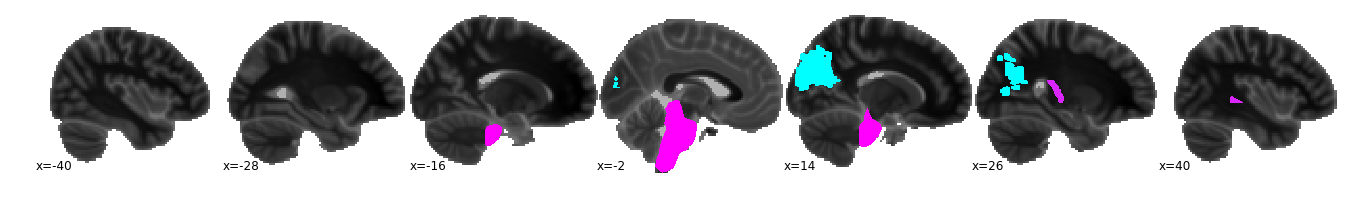

In [15]:
display = plotting.plot_anat(cmap=plt.cm.gray_r, display_mode = 'x')
display.add_overlay(data, cmap=mpl.cm.cool)

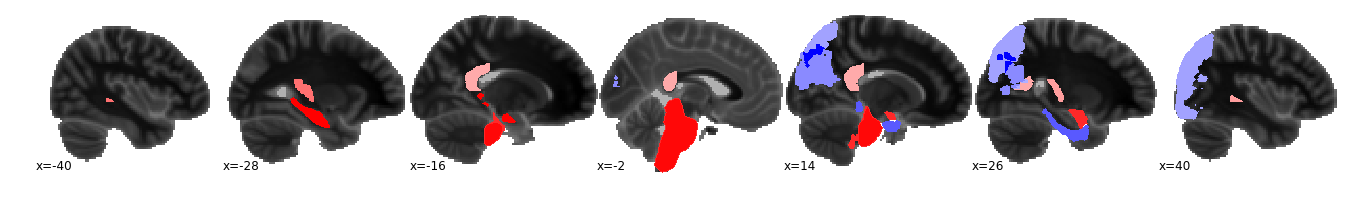

In [64]:
display = plotting.plot_anat(cmap=plt.cm.gray_r, display_mode = 'x')
display.add_overlay(data, cmap=mpl.cm.bwr)

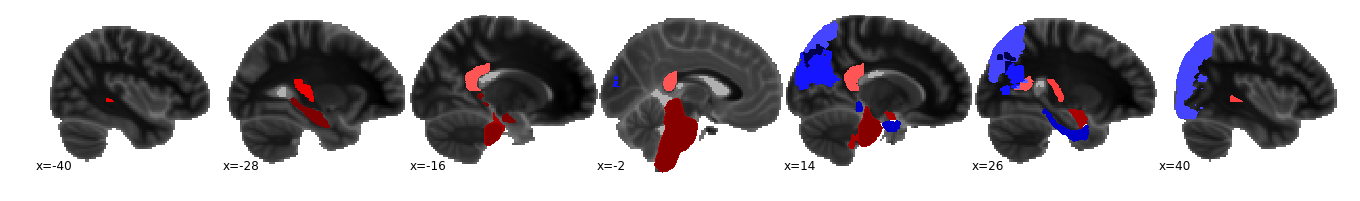

In [65]:
display = plotting.plot_anat(cmap=plt.cm.gray_r, display_mode = 'x')
display.add_overlay(data, cmap=mpl.cm.seismic)